In [8]:
# IMPORT LIBRARY 

from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split

# 随机森林, GBR, KNN, LR, Decision Tree, GNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import check_random_state
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
rs = check_random_state(4421)

In [9]:
data = pd.read_csv('games.csv')

data.drop(["t1_champ1id","t1_champ2id",
                      "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                      "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                      "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5","seasonId"],axis = 1,inplace = True)

data = data[data['gameDuration']>=300]

data=data[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills','t2_riftHeraldKills'
       ]]

In [10]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [11]:
X = data.drop(['winner'], axis=1)
Y = data['winner'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=rs)

In [12]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred = lr.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred.round())
print("Accuracy=", accuracy_test)


Accuracy= 0.9720648175762998


In [14]:
fpr[1], tpr[1], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[1] = auc(fpr[1], tpr[1])

In [15]:
#KNN
score = 0
precision = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    accuracy_test = accuracy_score(y_test,prediction.round())
    if (score < accuracy_test):
        y_pred = prediction
        score = knn.score(X_test, y_test)
        pos = k
    precision.insert(k, knn.score(X_test, y_test))
    
print("precision: {0: .8f}".format(score))
print("n_neighbors:"+format(pos))

precision:  0.97743314
n_neighbors:30


In [16]:
fpr[2], tpr[2], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[2] = auc(fpr[2], tpr[2])

In [17]:
# SVM-linear 
from sklearn.svm import SVC 

rbf = SVC(C=1,kernel='linear',probability=True)
rbf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
y_pred = rbf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred.round())
print("Accuracy=", accuracy_test)

Accuracy= 0.9716671637339696


In [19]:
fpr[3], tpr[3], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[3] = auc(fpr[3], tpr[3])

In [20]:
# SVM - rbf
from sklearn.svm import SVC 

rbf = SVC(gamma=0.1,kernel='rbf',probability=True)
rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [21]:
y_pred = rbf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred.round())
print("Accuracy=", accuracy_test)

Accuracy= 0.9801173078834874


In [22]:
fpr[4], tpr[4], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[4] = auc(fpr[4], tpr[4])

In [23]:
# Decision Tree
range1 = range(2, 30)
range2 = range(1, 8)
score = 0
precision = []

for es1 in range1:
    for es2 in range2:
        dtree = DecisionTreeRegressor(random_state=rs, 
                                      min_samples_split= es1, 
                                      min_samples_leaf = es2)
        dtree.fit(X_train, y_train)
        prediction = dtree.predict(X_test)
        accuracy_test = accuracy_score(y_test, prediction.round())
        if(score < accuracy_test):
            y_pred = prediction
            score = accuracy_test
            best1 = es1
            best2 = es2
        precision.insert(es1, accuracy_test)

print("Precision: {0: .10f}".format(score))
print("min_samples_split: " +format(best1))
print("min_samples_leaf: " +format(best2))

Precision:  0.9777313848
min_samples_split: 26
min_samples_leaf: 7


In [24]:
fpr[5], tpr[5], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[5] = auc(fpr[5], tpr[5])

In [25]:
# Random Forest
score = 0
precision = []

for n in range(1,50):
    rnf = RandomForestClassifier(n_estimators=n, random_state=rs)
    rnf.fit(X_train, y_train)
    prediction = rnf.predict(X_test)
    accuracy_test = accuracy_score(y_test, prediction.round())
    if (score<accuracy_test):
        y_pred = prediction
        score = accuracy_test
        pos = n
    precision.insert(n, accuracy_test)

print("precision: {0: .9f}".format(score))
print("n_estimators:"+format(pos))

precision:  0.980713789
n_estimators:36


In [26]:
fpr[6], tpr[6], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[6] = auc(fpr[6], tpr[6])

In [34]:
# Naive Bayes 
nb = GaussianNB()
nb.fit(X_train,y_train)
prediction = nb.predict(X_test)
accuracy_test = accuracy_score(y_test,prediction.round())
print( "Accuracy=", accuracy_test)

Accuracy= 0.9508897504722139


In [35]:
fpr[7], tpr[7], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[7] = auc(fpr[7], tpr[7])

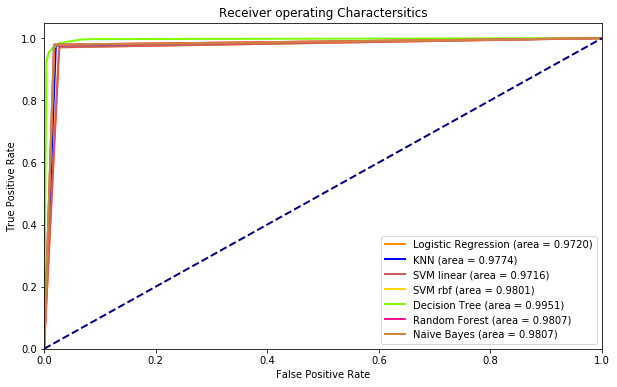

In [36]:
plt.figure(figsize=(10,6))
lw = 2

plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='Logistic Regression (area = %0.4f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue', lw=lw, label='KNN (area = %0.4f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='indianred', lw=lw, label='SVM linear (area = %0.4f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='gold', lw=lw, label='SVM rbf (area = %0.4f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='lawngreen', lw=lw, label='Decision Tree (area = %0.4f)' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='deeppink', lw=lw, label='Random Forest (area = %0.4f)' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='peru', lw=lw, label='Naive Bayes (area = %0.4f)' % roc_auc[7])



plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating Charactersitics')
plt.legend(loc="lower right")
plt.savefig('ROC')